<a href="https://colab.research.google.com/github/desstroyy/Vehicle-Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 8.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import yaml
with open('/content/drive/MyDrive/road/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 13, 'names': ['16-Wheelers', 'Ad-signs', 'Bike', 'Bus', 'Car', 'Fire-truck', 'MiniBus', 'Motorcycle', 'Person', 'Pickup', 'Traffic-light', 'Traffic-sign', 'Truck'], 'roboflow': {'workspace': 'test-v2-cekgn', 'project': 'smart-roads-v6', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/test-v2-cekgn/smart-roads-v6/dataset/1'}}


In [ ]:
model = YOLO('yolov5s.pt')


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 206MB/s]


In [ ]:
results = model.train(
    data='/content/drive/MyDrive/road/data.yaml',
    epochs=100,  # you can adjust this
    imgsz=640,  # you can adjust this based on your image sizes
    batch=16,  # adjust based on your GPU memory
    workers=8  # adjust based on your CPU
)

Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/drive/MyDrive/road/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 138MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/road/train/labels... 412 images, 0 backgrounds, 0 corrupt: 100%|██████████| 412/412 [02:32<00:00,  2.71it/s]


train: New cache created: /content/drive/MyDrive/road/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/road/valid/labels... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:48<00:00,  2.45it/s]

val: New cache created: /content/drive/MyDrive/road/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/26 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/100      4.08G      1.238       3.17      1.167        129        640: 100%|██████████| 26/26 [00:18<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]

                   all        118        989      0.626      0.203      0.163      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.05G      1.034      1.772      1.017        124        640: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

                   all        118        989      0.504      0.343      0.287      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.09G      1.003      1.619      1.018        109        640: 100%|██████████| 26/26 [00:09<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        118        989      0.399      0.367      0.311      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.99G      1.029      1.567      1.032        162        640: 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        118        989      0.482      0.422      0.389      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.97G     0.9685      1.372     0.9976        122        640: 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        118        989      0.401      0.417      0.379      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         4G     0.9558      1.286      1.012        174        640: 100%|██████████| 26/26 [00:12<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        118        989       0.55      0.445       0.39      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.97G     0.9781      1.263      1.008        129        640: 100%|██████████| 26/26 [00:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]

                   all        118        989      0.405      0.458      0.407      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.98G     0.9141      1.159      0.982        281        640: 100%|██████████| 26/26 [00:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        118        989      0.458      0.441      0.414      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.96G     0.9345      1.174      0.987        171        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        118        989      0.443      0.434      0.403      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.97G     0.9302       1.12     0.9893        192        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        118        989      0.567      0.409      0.412      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.96G     0.9201      1.112     0.9882        157        640: 100%|██████████| 26/26 [00:11<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        118        989      0.609      0.425      0.436      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.9G     0.9172      1.082     0.9797        223        640: 100%|██████████| 26/26 [00:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        118        989      0.523       0.46      0.432      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.96G     0.8885      1.091      0.978         73        640: 100%|██████████| 26/26 [00:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        118        989      0.498      0.451      0.411      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.97G     0.8819      1.039     0.9592        200        640: 100%|██████████| 26/26 [00:12<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

                   all        118        989      0.446      0.469      0.424      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.95G     0.8548     0.9959     0.9574        141        640: 100%|██████████| 26/26 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        118        989      0.595      0.448       0.47      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.96G     0.8573     0.9853     0.9466        162        640: 100%|██████████| 26/26 [00:10<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        118        989      0.454      0.447      0.428      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.03G     0.8644      1.011      0.959        138        640: 100%|██████████| 26/26 [00:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        118        989      0.579      0.529      0.511      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.02G     0.8903       1.01      0.973         89        640: 100%|██████████| 26/26 [00:11<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        118        989      0.543      0.469      0.459      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.99G     0.8288     0.9484     0.9459        153        640: 100%|██████████| 26/26 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        118        989      0.484      0.513      0.468      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.96G     0.8303     0.9168      0.943        190        640: 100%|██████████| 26/26 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all        118        989      0.607       0.43      0.481      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.99G     0.8408     0.9205     0.9463        189        640: 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        118        989      0.491      0.551      0.479      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.05G     0.8224     0.8854      0.939        158        640: 100%|██████████| 26/26 [00:11<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        118        989      0.441      0.538      0.456      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.98G     0.8037     0.8527     0.9317        153        640: 100%|██████████| 26/26 [00:13<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        118        989       0.56      0.486       0.52      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         4G     0.8339     0.8898     0.9481        312        640: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]

                   all        118        989      0.512      0.534      0.519      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.03G     0.7903     0.8436     0.9279        113        640: 100%|██████████| 26/26 [00:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        118        989      0.599      0.488      0.518      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.96G     0.7923     0.8593       0.93        172        640: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        118        989       0.54      0.456      0.497       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.05G     0.8077     0.8339      0.933        184        640: 100%|██████████| 26/26 [00:12<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        118        989      0.571      0.465      0.486       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.96G     0.7818     0.8139     0.9307        123        640: 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        118        989      0.526      0.525      0.514      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         4G     0.7854        0.8     0.9308        166        640: 100%|██████████| 26/26 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        118        989      0.656      0.475      0.526       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.03G     0.7898      0.842     0.9292        112        640: 100%|██████████| 26/26 [00:09<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        118        989      0.525      0.522      0.513      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.05G     0.7926     0.8018     0.9301        135        640: 100%|██████████| 26/26 [00:10<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        118        989      0.573      0.442      0.492      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         4G     0.7588     0.7829     0.9205        204        640: 100%|██████████| 26/26 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        118        989      0.533      0.548      0.518      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.04G     0.7722     0.7753     0.9226         94        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        118        989      0.578      0.499      0.516      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.02G     0.7923     0.8142     0.9342        178        640: 100%|██████████| 26/26 [00:09<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        118        989      0.579      0.499      0.493      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         4G     0.7559     0.7439     0.9194        105        640: 100%|██████████| 26/26 [00:10<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        118        989      0.587      0.486      0.517      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.02G     0.7555     0.7536     0.9134        134        640: 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]

                   all        118        989      0.474      0.598      0.532      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.17G     0.7512     0.7317     0.9185        172        640: 100%|██████████| 26/26 [00:13<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        118        989      0.665      0.451      0.483      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.99G     0.7464     0.7322     0.9023        171        640: 100%|██████████| 26/26 [00:10<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]

                   all        118        989      0.523      0.522      0.506      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.17G     0.7319     0.7282     0.9227        125        640: 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        118        989      0.558      0.497       0.52      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         4G     0.7633     0.7399     0.9133        196        640: 100%|██████████| 26/26 [00:12<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]

                   all        118        989      0.555      0.507      0.534      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.96G     0.7477     0.7541     0.9152        198        640: 100%|██████████| 26/26 [00:13<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

                   all        118        989       0.54      0.523      0.507      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       4.2G     0.7412     0.7281     0.9161        215        640: 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]

                   all        118        989       0.57      0.525      0.496      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       3.9G     0.7415      0.718     0.9117        192        640: 100%|██████████| 26/26 [00:09<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        118        989      0.422      0.565        0.5      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.06G     0.7228     0.6964     0.9153        149        640: 100%|██████████| 26/26 [00:11<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        118        989      0.477      0.505      0.502      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.04G     0.7155     0.6875     0.8996        187        640: 100%|██████████| 26/26 [00:12<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        118        989      0.418      0.586      0.509      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.01G     0.7176     0.6825     0.8952        137        640: 100%|██████████| 26/26 [00:12<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        118        989      0.465       0.52      0.514      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.95G      0.717     0.6883     0.9069        127        640: 100%|██████████| 26/26 [00:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        118        989      0.598      0.523      0.523      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.96G     0.7066     0.6749     0.9078        164        640: 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        118        989      0.448      0.536      0.514      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.98G     0.7106     0.6791     0.9125        168        640: 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        118        989      0.591      0.495      0.527      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.98G      0.704     0.6653     0.9015        165        640: 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        118        989      0.547      0.547      0.503      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.96G     0.6792     0.6396     0.8907        159        640: 100%|██████████| 26/26 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        118        989      0.586      0.568      0.543      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.98G     0.6913     0.6508     0.8909        184        640: 100%|██████████| 26/26 [00:08<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        118        989      0.523      0.595      0.528      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.01G     0.7035     0.6532     0.9006        177        640: 100%|██████████| 26/26 [00:11<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        118        989      0.556      0.556      0.531      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.99G     0.6853     0.6215     0.8863        145        640: 100%|██████████| 26/26 [00:13<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]

                   all        118        989      0.553      0.517      0.532      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.95G     0.6867     0.6248     0.8896        141        640: 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        118        989      0.603      0.515      0.532       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.04G     0.6849     0.6329     0.8902        159        640: 100%|██████████| 26/26 [00:09<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        118        989      0.557      0.521      0.528       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.97G     0.6978     0.6359     0.8917        151        640: 100%|██████████| 26/26 [00:10<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        118        989      0.585      0.538      0.549      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.99G     0.6779     0.6143     0.8866        242        640: 100%|██████████| 26/26 [00:13<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        118        989      0.627      0.492      0.557       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.18G     0.6822     0.6128     0.8899        167        640: 100%|██████████| 26/26 [00:12<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        118        989      0.548      0.589      0.529      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.96G     0.6886     0.6092     0.8952        103        640: 100%|██████████| 26/26 [00:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        118        989      0.537      0.471      0.511      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.99G     0.6572     0.6009      0.879        179        640: 100%|██████████| 26/26 [00:09<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        118        989      0.512      0.551      0.553      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.96G     0.6763     0.5991     0.8879        177        640: 100%|██████████| 26/26 [00:12<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.92it/s]

                   all        118        989      0.499       0.55      0.546      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.07G     0.6841     0.5971     0.8873        133        640: 100%|██████████| 26/26 [00:12<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        118        989      0.596      0.462      0.536      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.97G      0.671     0.5889     0.8826        157        640: 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        118        989      0.467      0.548      0.526      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.94G     0.6722     0.5937     0.8872        162        640: 100%|██████████| 26/26 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        118        989      0.541      0.607      0.546      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.99G     0.6351     0.5714     0.8791        202        640: 100%|██████████| 26/26 [00:11<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        118        989      0.616      0.493      0.548      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.94G     0.6395     0.5657     0.8745        138        640: 100%|██████████| 26/26 [00:12<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.89it/s]

                   all        118        989      0.605      0.573      0.561      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         4G     0.6443     0.5741     0.8848        163        640: 100%|██████████| 26/26 [00:11<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        118        989      0.609      0.522      0.556      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.22G     0.6316     0.5622     0.8762        213        640: 100%|██████████| 26/26 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        118        989      0.548      0.509      0.521      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.96G     0.6169     0.5442     0.8707        189        640: 100%|██████████| 26/26 [00:10<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        118        989      0.596      0.493      0.554       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       4.1G      0.633     0.5674     0.8785        168        640: 100%|██████████| 26/26 [00:13<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        118        989      0.533      0.485      0.541      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         4G     0.6438     0.5681      0.876        128        640: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        118        989      0.506      0.531      0.549      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.02G     0.6393     0.5567     0.8703        135        640: 100%|██████████| 26/26 [00:09<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        118        989      0.459       0.57      0.532      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         4G      0.627     0.5406     0.8755        141        640: 100%|██████████| 26/26 [00:10<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        118        989      0.674      0.454      0.532      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.05G     0.6402     0.5411     0.8784        142        640: 100%|██████████| 26/26 [00:12<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.84it/s]

                   all        118        989      0.581      0.553      0.542       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.98G     0.6146     0.5364     0.8706        165        640: 100%|██████████| 26/26 [00:12<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        118        989      0.586      0.559      0.562      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         4G     0.6255     0.5348     0.8811        144        640: 100%|██████████| 26/26 [00:10<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        118        989      0.444      0.648      0.557      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.95G     0.6101     0.5339     0.8708        120        640: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        118        989      0.613      0.538       0.54       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.05G     0.6013     0.5079     0.8657        158        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        118        989      0.578      0.538      0.544      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.05G     0.6326     0.5266     0.8708        250        640: 100%|██████████| 26/26 [00:12<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        118        989      0.601       0.53      0.562      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.97G     0.6023     0.5155     0.8662        124        640: 100%|██████████| 26/26 [00:11<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all        118        989       0.61      0.561      0.566      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.98G     0.5967     0.5157     0.8687        243        640: 100%|██████████| 26/26 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        118        989      0.542      0.562      0.558      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       4.1G      0.593     0.4957     0.8633        155        640: 100%|██████████| 26/26 [00:11<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        118        989      0.482      0.571      0.543       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.96G     0.5964     0.5202     0.8632        181        640: 100%|██████████| 26/26 [00:13<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        118        989      0.484      0.569      0.544      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.26G     0.6007     0.5077     0.8661        209        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        118        989       0.53      0.595      0.573      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.97G     0.5844     0.4972     0.8622        223        640: 100%|██████████| 26/26 [00:09<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all        118        989      0.509      0.583      0.581      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.97G     0.5953     0.5012     0.8663        122        640: 100%|██████████| 26/26 [00:10<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        118        989      0.518      0.544      0.567      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.96G     0.5868     0.4943     0.8598        204        640: 100%|██████████| 26/26 [00:12<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        118        989      0.543      0.517      0.559      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.04G     0.6009     0.4957     0.8623         89        640: 100%|██████████| 26/26 [00:13<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        118        989      0.521      0.566      0.564      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.09G     0.5979     0.4889     0.8615        189        640: 100%|██████████| 26/26 [00:10<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.00it/s]

                   all        118        989      0.514      0.558      0.573      0.478


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.96G     0.5613     0.4532     0.8442        112        640: 100%|██████████| 26/26 [00:16<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        118        989      0.647      0.502      0.566      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.98G     0.5312     0.4316     0.8408         83        640: 100%|██████████| 26/26 [00:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        118        989       0.61      0.535      0.565      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.96G     0.5411     0.4326     0.8393        134        640: 100%|██████████| 26/26 [00:09<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        118        989      0.498      0.589      0.554      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         4G     0.5347     0.4259     0.8407         64        640: 100%|██████████| 26/26 [00:11<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        118        989      0.467       0.62       0.56      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.95G     0.5274     0.4066     0.8297        139        640: 100%|██████████| 26/26 [00:13<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.87it/s]

                   all        118        989      0.601      0.551      0.558      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.93G     0.5467     0.4201     0.8354        139        640: 100%|██████████| 26/26 [00:10<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]

                   all        118        989      0.617       0.53      0.571       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.94G     0.5281     0.4084     0.8334        111        640: 100%|██████████| 26/26 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        118        989       0.63      0.527      0.574      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.96G     0.5225     0.4077     0.8304        137        640: 100%|██████████| 26/26 [00:11<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        118        989      0.606      0.575      0.577      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.95G     0.5156     0.3956     0.8331        126        640: 100%|██████████| 26/26 [00:13<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.07it/s]

                   all        118        989      0.588      0.582       0.57      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.99G     0.5299     0.4094     0.8391        105        640: 100%|██████████| 26/26 [00:11<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        118        989      0.481      0.619      0.568      0.481



100 epochs completed in 0.428 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5s summary (fused): 193 layers, 9,116,567 parameters, 0 gradients, 23.9 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.53s/it]


                   all        118        989      0.509      0.582      0.581      0.491
           16-Wheelers          3          4      0.252        0.5      0.368      0.317
              Ad-signs          8          9      0.466          1      0.715      0.687
                  Bike          1          2          0          0      0.284       0.16
                   Bus         39         41      0.713       0.78      0.786      0.714
                   Car         97        587      0.711      0.736      0.733      0.621
            Fire-truck          1          1          0          0          0          0
               MiniBus         16         17      0.542      0.647      0.649      0.644
            Motorcycle         39         70      0.566        0.6      0.604      0.392
                Person         62        162      0.648      0.469      0.596      0.413
                Pickup         21         26      0.581      0.731      0.651      0.632
         Traffic-ligh

In [ ]:
import torch
torch.save(model.model.state_dict(), 'yolov5s_state_dict.pt')


In [ ]:
import torch
from ultralytics import YOLO
model = YOLO('yolov5s.pt')
state_dict = torch.load('yolov5s_state_dict.pt')
model.model.load_state_dict(state_dict)

In [ ]:
results = model.val(
    data='/content/drive/MyDrive/road/data.yaml',  # path to your data.yaml file
    imgsz=640,  # size of images
    batch=8,  # adjust based on your GPU memory
    device='0'  # GPU device (use 'cpu' if no GPU)
)

Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5s summary (fused): 193 layers, 9,116,567 parameters, 0 gradients, 23.9 GFLOPs


val: Scanning /content/drive/MyDrive/road/valid/labels.cache... 118 images, 0 backgrounds, 0 corrupt: 100%|██████████| 118/118 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.06it/s]


                   all        118        989      0.509      0.583      0.581       0.49
           16-Wheelers          3          4      0.251        0.5      0.368      0.317
              Ad-signs          8          9      0.466          1      0.715      0.687
                  Bike          1          2          0          0      0.284       0.16
                   Bus         39         41      0.712       0.78      0.785      0.718
                   Car         97        587      0.713      0.736      0.733      0.621
            Fire-truck          1          1          0          0          0          0
               MiniBus         16         17      0.541      0.647      0.649      0.634
            Motorcycle         39         70      0.561        0.6      0.602      0.388
                Person         62        162      0.647      0.469      0.597      0.412
                Pickup         21         26       0.58      0.731      0.651      0.633
         Traffic-ligh

In [ ]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dab64b8ae30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.04504

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [ ]:
test_images_path = '/content/drive/MyDrive/road/test/images/'  # adjust this to your test images folder
image_files = os.listdir(test_images_path)
random_image = random.choice(image_files)
image_path = os.path.join(test_images_path, random_image)

In [ ]:
results = model.predict(source=image_path, save=True)


image 1/1 /content/drive/MyDrive/road/test/images/img_10082020_1131113120-Copy-Copy_jpg.rf.5e640ab00d94bae055366dd692a9fd14.jpg: 640x640 2 Cars, 1 MiniBus, 1 Motorcycle, 3 Persons, 3 Traffic-lights, 41.7ms
Speed: 2.4ms preprocess, 41.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train4


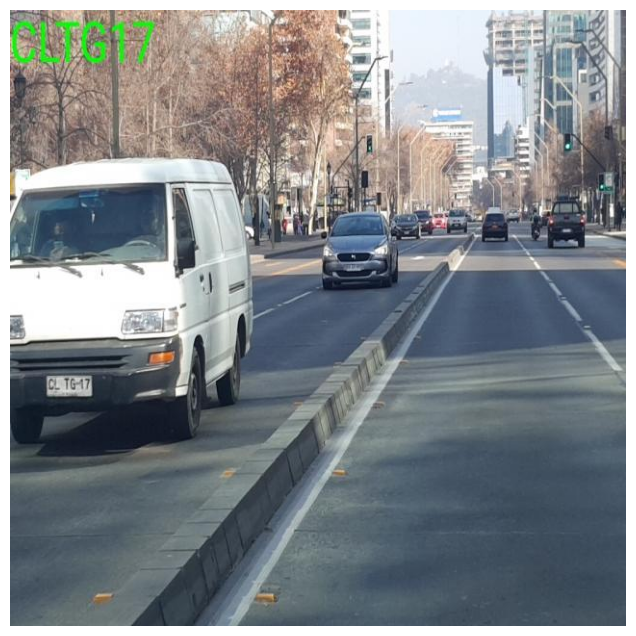

In [ ]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.


image 1/1 /content/drive/MyDrive/road/test/images/image_1_4306_jpg.rf.42a37a3610a577f20b0eb117028d113c.jpg: 640x640 2 cars, 1 bus, 15.1ms
Speed: 2.7ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


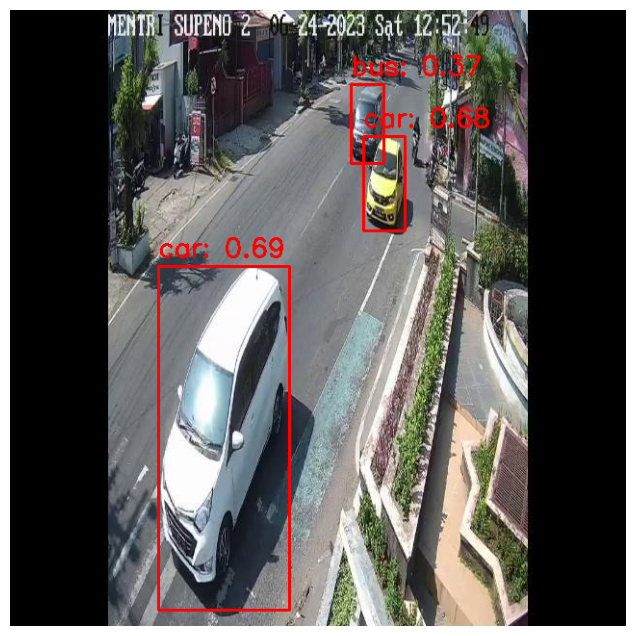

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
model = YOLO('yolov5s.pt')
test_images_path = '/content/drive/MyDrive/road/test/images/'
image_files = os.listdir(test_images_path)
random_image = random.choice(image_files)
image_path = os.path.join(test_images_path, random_image)
results = model.predict(source=image_path, save=False)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
boxes = results[0].boxes

for box in boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    label = int(box.cls)
    score = float(box.conf)

    label_text = f'{model.names[label]}: {score:.2f}'

    cv2.rectangle(image, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

    cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()
